In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams["axes.edgecolor"] = "black"

# EDA 

In [2]:
# Load cleaned from data cleaning
df = pd.read_csv('datasets/cleaned.csv')

In [3]:
df

,number,code,price
0,1313,U,109000
1,3222,H,72000
2,30033,P,24000
3,7765,L,17500
4,8876,U,17500
...,...,...,...
2963,26277,U,2400
2964,28299,U,2400
2965,63383,U,2400
2966,93966,U,2400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  2968 non-null   int64 
 1   code    2968 non-null   object
 2   price   2968 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 69.7+ KB


## Number of digits sanity checks

In [5]:
# new col for # digits
# Datatype switcheroo for producing new colum with less loc
df['number'] = df['number'].astype(str)
df['num_digits'] = df['number'].apply(lambda x: len(x))
df['number'] = df['number'].astype(int)

df.head()

,number,code,price,num_digits
0,1313,U,109000,4
1,3222,H,72000,4
2,30033,P,24000,5
3,7765,L,17500,4
4,8876,U,17500,4


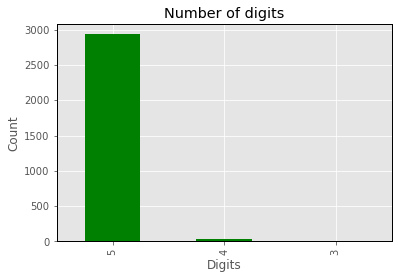

In [8]:
# plot # digits for dataviz
df['num_digits'].value_counts().plot(kind = 'bar', color = 'green');
plt.title('Number of digits');
plt.xlabel('Digits');
plt.ylabel('Count');

In [7]:
# same dataviz but this time numbers. 
# This poses dillemma of should I drop 
# the lesser numbers to balance dataset. 
# However number of digits is a v.imp feature
df['num_digits'].value_counts()

5    2934
4      33
3       1
Name: num_digits, dtype: int64

In [15]:
# Given 5 is the most common # plate, 
# Our models evaluation metrics will have to satisfy these numbers
# basically get RMSE, MAE as close to std as possible
# If higher than STD, model is unfeasible 
# However results could go off kilter with <5 digits
df.loc[df['num_digits'] == 5,'price'].describe()

count     2934.000000
mean      2765.507839
std       1869.283480
min       2000.000000
25%       2400.000000
50%       2400.000000
75%       2600.000000
max      72000.000000
Name: price, dtype: float64

In [16]:
# Seems to me there is much more room for error here
# Producing a model within these metrics wouldn't be hard
df.loc[df['num_digits'] != 5,'price'].describe()

count        34.000000
mean      27523.529412
std       40296.402267
min        6900.000000
25%       12500.000000
50%       13200.000000
75%       17350.000000
max      215000.000000
Name: price, dtype: float64

In [17]:
# As expected somewhere in between
# This might prove to be difficult
df['price'].describe()

count      2968.000000
mean       3049.123989
std        5334.634080
min        2000.000000
25%        2400.000000
50%        2400.000000
75%        2600.000000
max      215000.000000
Name: price, dtype: float64